# Polynomial Regression 

So far, all the examples of regression had a straight line. Polynomial regression models relationships are a curve. The more features there are the more complex the curve will be.

So instead of the familiar $y = mx + c$ we will not have a function that can be similar to this $y = Ax^2 + Bx + C$. 

So for a quick example let's make up a function as follows:

$y = 5x^2 + 3x + 1$ having $x$ values range from 0 to 10.

First, let's load the data.

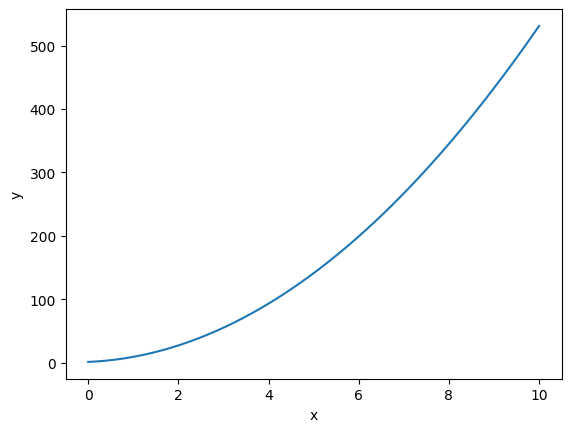

In [3]:
import numpy as np
from matplotlib import pyplot as plt

a = 5
b = 3
c = 1

x = np.linspace(0, 10, 50)
y = a*(x*x) + 3*x + c

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Comparison of Linear and Polynomial Regression

The benefit of polynomial curves is that they can fit a model better, but their main disadvantage is they extrapolate poorly and have a tendency to overfit.

Ideally, you do not use polynomial regression for multiple features, since the relationships can end up very complex, and do not reflect real-life situations.

In [4]:
import pandas as pd

data = pd.read_csv('./auto-mpg-simple.csv')
data.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


## Simple Regression

First let's start with a simple linear regression.

0.6917929800341576


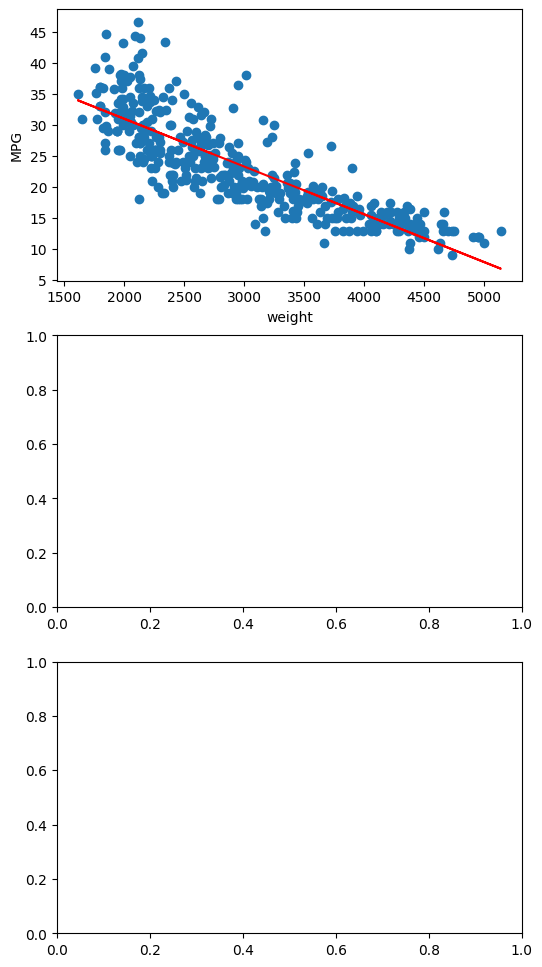

In [7]:
import statsmodels.formula.api as smf

fig, ax = plt.subplots(3, 1, figsize=(6,12))
i = 0

features = ['weight']

for feature in features:
    model = smf.ols(formula=f"mpg~{feature}", data=data).fit()     
    print(model.rsquared)

    ax[i].scatter(data[feature], data.mpg)
    ax[i].plot(data[feature], model.fittedvalues, color='red')
    ax[i].set_ylabel('MPG')
    ax[i].set_xlabel(feature)
    i+=1

We can see that weight's R-Value is 0.69, the F-Statistic is 888.9.

## Simple Polynomial Regression

Now let's try to fit a polynomial regression, rather than a simple linear one. First we create a `polyfit` for weight and mpg based on 2 degrees (the more the degrees the more complex the curve will be). The will create the function that we need for the polynomial curve. The regression model, then uses this function in its formula.

In [12]:
weights = np.polyfit(data.weight, data.mpg, 2)
model = np.poly1d(weights)

results = smf.ols(formula='mpg~model(weight)', data=data).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     992.4
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          6.29e-110
Time:                        10:32:09   Log-Likelihood:                -1132.9
No. Observations:                 398   AIC:                             2270.
Df Residuals:                     396   BIC:                             2278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.051e-13      0.775  -1.36e-13      1.000      -1.524       1.524
model(weight)     1.0000      0.032     31.503      0.000       0.938       1.062
==============================================================================
Omnibus:                       51.743   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.990
Skew:                           0.784   Prob(JB):                     7.82e-20
Kurtosis:                       4.688   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we can see that weight's R-Value is 0.71 (from 0.69), the F-Statistic is 992.4 (from 888.9). So, overall this fits the data better.

Note that when we create the polyfit, you can expriment with the degrees, but the more complex the curve is, the more chance it is overfitted or does not perform well when extrapolated.

### Plotting Polynomial Curve

Now, let's plot the regression curve. First, we will create a range of numbers that represent the weight, these will range from the minimum value to the maximum value of the weights, and in this case, we have stepped them at 250. Then the previously generated function is used on this range, to generate the y co-ordinates (predicted mpg).

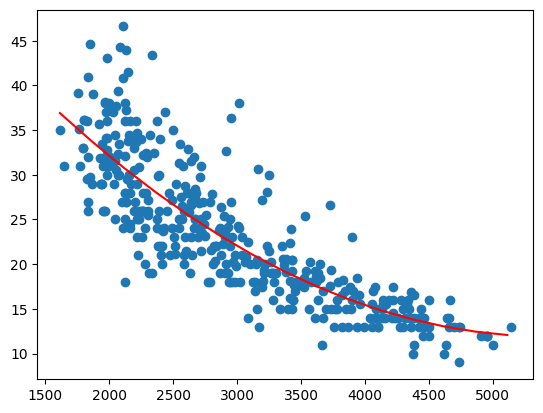

In [17]:
plt.scatter(data.weight, data.mpg)
rng = range(data.weight.min(), data.weight.max(), 250)
plt.xlabel=('weight')
plt.ylabel=('MPG')
plt.plot(rng, model(rng), color='red')

### Extrapolating Polynomial Curve

We can also try to extrapolate to see what happens.

Text(0.5, 0, 'Weight')

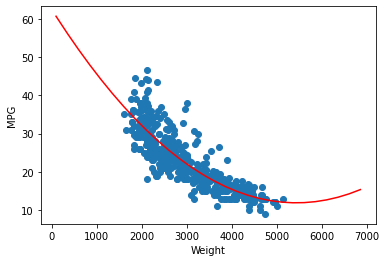